<a href="https://colab.research.google.com/github/Sagu12/all-projects/blob/master/BOOSTING_XGBOOST_CLASSIFIER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

#DIFFERENCE BEWEEN ADABOOST AND XGBOOST
Both methods use a set of weak learners. They try to boost these weak learners into a strong learner. I assume that the strong learner is additive by the weak learners.

Gradient boosting generates learners during the learning process. It build first learner to predict the values/labels of samples, and calculate the loss (the difference between the outcome of the first learner and the real value). It will build a second learner to predict the loss after the first step. The step continues to learn the third, forth… until certain threshold.

Adaboost requires users specify a set of weak learners (alternatively, it will randomly generate a set of weak learner before the real learning process). It will learn the weights of how to add these learners to be a strong learner. The weight of each learner is learned by whether it predicts a sample correctly or not. If a learner is mispredict a sample, the weight of the learner is reduced a bit. It will repeat such process until converge.


The XGBOOST library implements the gradient boosting decision tree algorithm.
It is called gradient boosting because it uses the concept of gradient descent that is minimizing the loss at each successful iteration of the machine learning model.

This approach is applicable for both regression and classification models.

So in simple words we can also say that in XGBOOST suppose we have 10 samples of the features and their related targets, now initially these samples are given common weights and then a random forest decision trees are formed. Now at first tree lets say that three of the samples got wrongly predicted and the rest 7 got rightly predicted now, in the next decision tree the model would take the weak learner or the samples which got wrongly predicted and will update the weights of the same considering the rest 7 sample weights as it was in the first tree now, here we see that other two samples got wronjgly predicted, so again the process of updation of weights will go on and this process will continue till the no. of trees or estimators we have provided the model and at the end the frequency of the targets for these trees is looked upon and based on the higher frequency the target is predicted either yes or no or anything else as specified by the user.

For regression the same process is carried out but rather than calculating the frequency we calculate the mean of all the tree outputs and give the same as the desired output.

In the case of Adaboost the same process of updation of weights is done but here in addition we decrease the value of the weights of the strong learners and increase the value of weak learners at successful trees and based on the same criteria as was used in XGBOOST we try to reduce the error by updating the weights and the output is predicted by looking at the frequencies of the successful trees.

in adaboost the loss and perforance are the parameters that are taken into account for updating the weights. Also the concept of normalizing the updated weights to give a summation of 1 is also carried out.



In [54]:
!pip install xgboost

In [0]:
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [0]:
tips= sns.load_dataset("iris")

In [57]:
tips.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [58]:
X= tips.drop("species", axis=1)
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [59]:
y= tips.species
y.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

In [0]:
from sklearn.preprocessing import LabelEncoder

In [0]:
le= LabelEncoder()

In [0]:
y_new= le.fit_transform(y)

In [64]:
y_new

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [0]:
df_y= pd.DataFrame(y_new, columns=["new"])

In [79]:
df_y

,new
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [0]:
X_train,X_test,y_train,y_test= train_test_split(X,df_y, test_size=0.2, random_state=10)

In [82]:
X_train.shape, y_train.shape

((120, 4), (120, 1))

In [0]:
model= XGBClassifier()

In [97]:
model.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
y_pred= model.predict(X_test)

In [100]:
y_pred

array([1, 2, 0, 1, 0, 1, 1, 1, 0, 1, 1, 2, 1, 0, 0, 2, 1, 0, 0, 0, 2, 2,
       2, 0, 1, 0, 1, 1, 1, 2])

In [0]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [106]:
accuracy_score(y_test,y_pred)

1.0

In [107]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        10\n           1       1.00      1.00      1.00        13\n           2       1.00      1.00      1.00         7\n\n    accuracy                           1.00        30\n   macro avg       1.00      1.00      1.00        30\nweighted avg       1.00      1.00      1.00        30\n'

In [0]:
cm= confusion_matrix(y_test, y_pred)

In [109]:
cm

array([[10,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  7]])

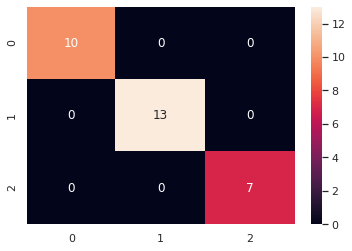

In [110]:
sns.heatmap(cm,annot=True)
